Introduction
- Spatial autocorrelation : non-random pattern of attribute values over a set of spatial units. 
- Autocorrelation arises when the observed spatial pattern is different from what would be expected under a random process operating in space.

- Global autocorrelation analysis involves the study of the entire map pattern and generally asks the question as to whether the pattern displays clustering or not. 
- Local autocorrelation, on the other hand, shifts the focus to explore within the global pattern to identify clusters or so called hot spots that may be either driving the overall clustering pattern, or that reflect heterogeneities that depart from global pattern.


__ Gamma Index__ of spatial autocorrelation consists of the application of the principle behind a general cross-product statistic to measuring spatial autocorrelation. 
- The idea is to assess whether two similarity matrices for n objects, i.e., n by n matrices A and B measure the same type of similarity. This is reflected in a so-called Gamma Index $$\Gamma = \sum_i \sum_j a_{ij}\cdot b_{ij}$$

The statistic consists of the sum over all cross-products of matching elements (i,j) in the two matrices.

first similarity matrix :   a measure of attribute similarity.
any reasonable measure of attribute similarity or dissimilarity, such as a cross-product, squared difference or absolute difference.


second matrix : a measure of locational similarity. 
a spatial weight matrix. 


$$ \Gamma = \sum_i \sum_j a_{ij}\cdot w_{ij}$$

where the $w_{ij}$ are the elements of the weights matrix and $a_{ij}$  are corresponding measures of attribute similarity.

Inference for this statistic is based on a permutation approach in which the values are shuffled around among the locations and the statistic is recomputed each time. 
This creates a reference distribution for the statistic under the null hypothesis of spatial randomness. 
The observed statistic is then compared to this reference distribution and a pseudo-significance computed as
$$p = (m + 1) / (n + 1)$$
where $m$ is the  number of values from the reference distribution that are equal to or greater than the observed joint count and $n$ is the number of permutations.

The Gamma test is a two-sided test in the sense that both extremely high values (e.g., larger than any value in the reference distribution) and extremely low values (e.g., smaller than any value in the reference distribution) can be considered to be significant. 

Depending on how the measure of *attribute similarity* is defined, a *high value* will indicate positive or negative spatial autocorrelation, and vice versa. 
For example, for a *cross-product measure of attribute similarity*, high values indicate positive spatial autocorrelation and low values negative spatial autocorrelation. 
For a squared difference measure, it is the reverse. This is similar to the interpretation of the Moran’s I statistic and Geary’s C statistic respectively.



In [13]:
% matplotlib inline

In [9]:
import pysal
import numpy as np
import matplotlib.pylab as plt

In [14]:
f = pysal.open(pysal.examples.get_path("stl_hom.txt"))

In [18]:
y = np.array(f.by_col['HR8893'])

In [19]:
w = pysal.open(pysal.examples.get_path("stl.gal")).read()

In [22]:
mi = pysal.Moran(y, w, two_tailed=False)

(78,)

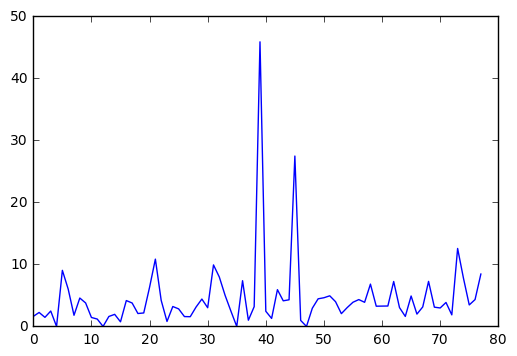

In [23]:
plt.plot(y)
y.shape

In [24]:
mi = pysal.Moran(y, w, two_tailed=False)

In [31]:
mi.I

0.24365582621771695

In [32]:
np.random.seed(10)
mir = pysal.Moran(y, w, permutations = 9999)

In [35]:
mir.p_sim

0.0022000000000000001

In [37]:
f = pysal.open(pysal.examples.get_path("stl_hom.txt"))
y = np.array(f.by_col['HR8893'])
w = pysal.open(pysal.examples.get_path("stl.gal")).read()
np.random.seed(12345)
lm = pysal.Moran_Local(y,w)
print lm.n
print len(lm.Is)


78
78


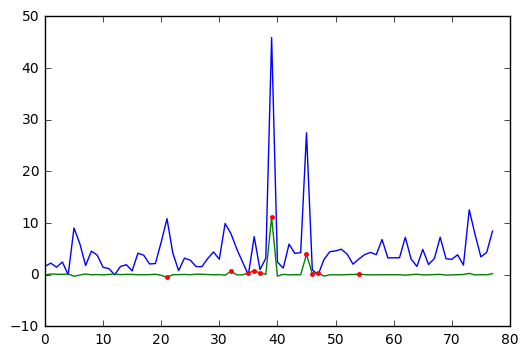

In [60]:
x = np.arange(np.size(sig))[sig]
plt.plot(y)
plt.plot(lm.Is)
plt.plot(x, lm.Is[sig], '.')

In [54]:
sig = lm.p_sim<0.05
sig = lm.p_sim<0.05